<a href="https://colab.research.google.com/github/sanmeshh/tflite_learning/blob/1.Intro_to_tflite/Intro_Tf_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [161]:
tf.__version__

'2.18.0'

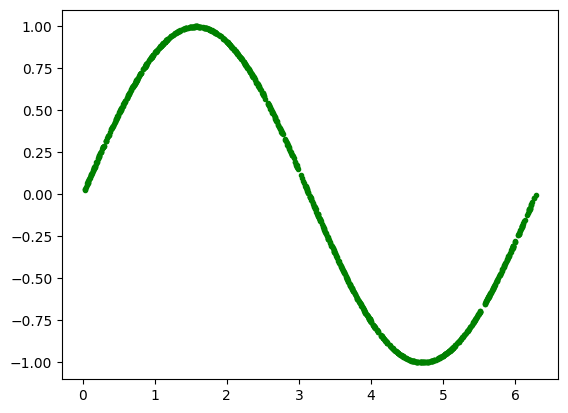

In [162]:
#generate random numbers and calculate their sin(x)

samples=1000
np.random.seed(42)
tf.random.set_seed(42)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values=np.random.uniform(low=0,high=2*math.pi,size=samples)

#shuffling so that they are not in an order
np.random.shuffle(x_values)

y_values=np.sin(x_values)

plt.plot(x_values,y_values,'g.')
plt.show()

In [163]:
#lets make our data noisy
y_values+=0.1*np.random.randn(*y_values.shape)

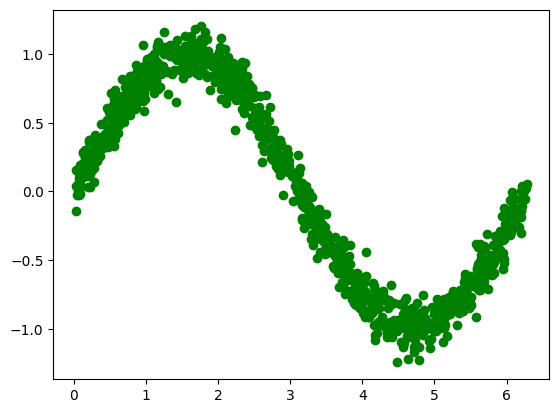

In [164]:
plt.plot(x_values,y_values,'go')

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.2,random_state=42)

In [167]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=100)

In [168]:
samples

1000

In [169]:
assert(x_train.size+x_val.size+x_test.size)==samples

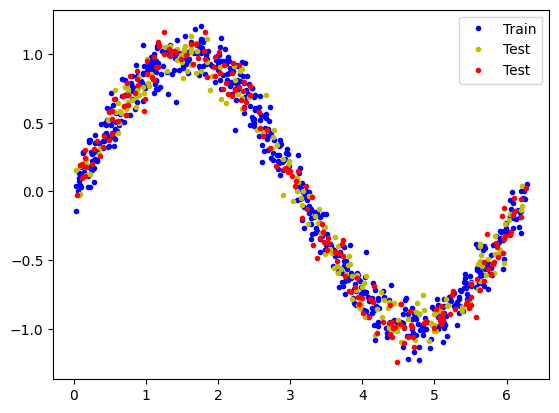

In [170]:
plt.plot(x_train,y_train,'b.',label='Train')
plt.plot(x_val,y_val,'y.',label='Test')
plt.plot(x_test,y_test,'r.',label='Test')
plt.legend()
plt.show()

In [171]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [172]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(1,)),
                 Dense(1)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [174]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [175]:
history=model.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data=(x_val,y_val))

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2632 - mae: 1.0228 - val_loss: 0.6358 - val_mae: 0.6635
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6022 - mae: 0.6413 - val_loss: 0.3699 - val_mae: 0.4990
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3757 - mae: 0.5063 - val_loss: 0.3203 - val_mae: 0.4830
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3260 - mae: 0.4855 - val_loss: 0.2978 - val_mae: 0.4684
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3002 - mae: 0.4674 - val_loss: 0.2745 - val_mae: 0.4517
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2757 - mae: 0.4482 - val_loss: 0.2531 - val_mae: 0.4360
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2534 - mae: 0.4301 - val_loss: 0.2338 - val_mae: 0.4214
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2335 - mae: 0.4141 - val_loss: 0.2169 - val_mae: 0.4077
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

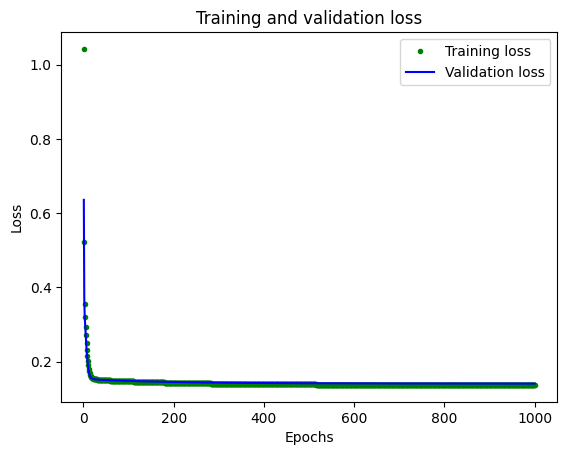

In [176]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'g.',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


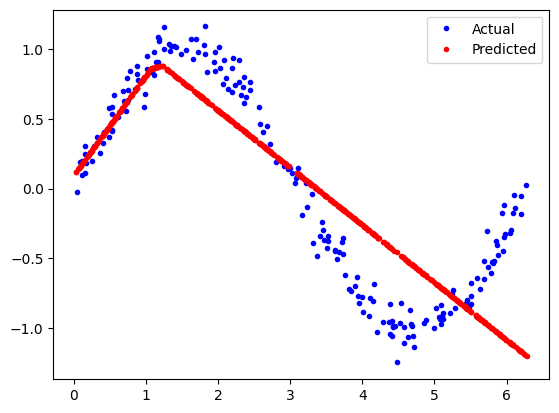

In [177]:
predictions=model.predict(x_train)
plt.clf()
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,predictions,'r.',label='Predicted')
plt.legend()
plt.show()

In [178]:
model2=Sequential([
    Dense(16,activation='relu',input_shape=(1,)),
    Dense(16,activation='relu'),
    Dense(1)
])

In [179]:
model2.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [180]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
history2=model2.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data=(x_val,y_val))


Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8056 - mae: 0.7864 - val_loss: 0.5037 - val_mae: 0.6354
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4704 - mae: 0.6024 - val_loss: 0.4088 - val_mae: 0.5540
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4061 - mae: 0.5472 - val_loss: 0.3618 - val_mae: 0.5164
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3604 - mae: 0.5126 - val_loss: 0.3136 - val_mae: 0.4821
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3093 - mae: 0.4757 - val_loss: 0.2697 - val_mae: 0.4497
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2634 - mae: 0.4408 - val_loss: 0.2254 - val_mae: 0.4132
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2217 - mae: 0.4072 - val_loss: 0.1925 - val_mae: 0.3813
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1924 - mae: 0.3820 - val_loss: 0.1698 - val_mae: 0.3576
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

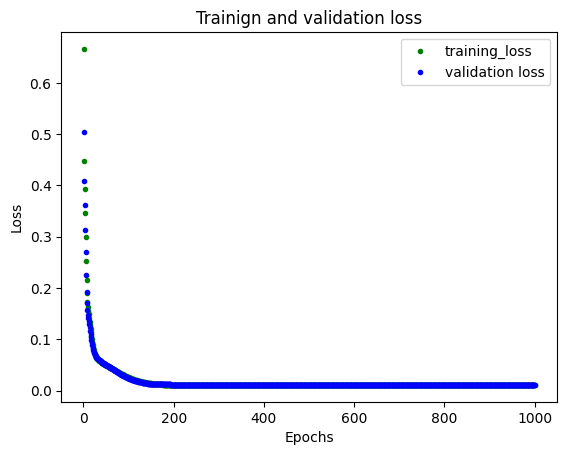

In [182]:
loss=history2.history['loss']
val_loss=history2.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'g.',label='training_loss')
plt.plot(epochs,val_loss,'b.',label='validation loss')
plt.title('Trainign and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


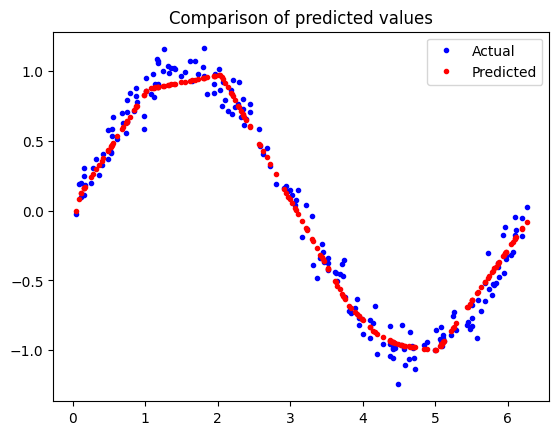

In [183]:
predictions=model2.predict(x_test)
plt.title('Comparison of predicted values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_test,predictions,'r.',label='Predicted')
plt.legend()
plt.show()

Converting the model into tensorflow lite

 TensorFlow Lite Converter
 This converts TensorFlow models into a special, space-efficient format for use on
 memory-constrained devices, and it can apply optimizations that further reduce
 the model size and make it run faster on small devices.
 TensorFlow Lite Interpreter
 This runs an appropriately converted TensorFlow Lite model using the most efficient operations for a given device

In [221]:
# Convert the model to the TensorFlow Lite format without quantization
converter=tf.lite.TFLiteConverter.from_keras_model(model2)

In [222]:
tflite_model=converter.convert()
open('sine_model.tflite','wb').write(tflite_model)

Saved artifact at '/tmp/tmpwpgkf56e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135172278391376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278387344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278386960: TensorSpec(shape=(), dtype=tf.resource, name=None)


3180

In [187]:
#converting the model WITH quantization

In [223]:
converter=tf.lite.TFLiteConverter.from_keras_model(model2)

#Indicates that we want to perform the default optimizations,
# which include quantization
converter.optimizations=[tf.lite.Optimize.DEFAULT]

#Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    yield[np.array(value,dtype=np.float32,ndmin=2)]
converter.representative_dataset=representative_dataset_generator



tflite_model=converter.convert()

open("sine_model_quantized.tflite","wb").write(tflite_model)

Saved artifact at '/tmp/tmp5ou6gber'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135172278391376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278388496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278387344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135172278386960: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3792

Note:

To create a quantized model that runs as efficiently as possible, we need to provide a
representative dataset—a set of numbers that represent the full range of input values
of the dataset on which the model was trained.

In [224]:
#Testing the quantized model

Since it’s designed primarily for efficiency, The TensorFlow Lite interpreter is
slightly more complicated to use than the Keras API

Steps:

1. Instantiate an Interpreter object.
2. Call some methods that allocate memory for the model.
3. Write the input to the input tensor.
4. Invoke the model.


In [225]:
sine_model = tf.lite.Interpreter('sine_model.tflite')

sine_model_q = tf.lite.Interpreter('sine_model_quantized.tflite')

#To prove these models(previous one and quantized one) are still accurate after conversion and quantization, we use
#both of them to make predictions and compare these against our test results

In [226]:
#allocating memory for both the models
sine_model.allocate_tensors()
sine_model_q.allocate_tensors()

In [227]:
#Get indexed of the input and the output tensors
sine_model_input_index=sine_model.get_input_details()[0]['index']
sine_model_output_index=sine_model.get_output_details()[0]["index"]
sine_model_q_input_index=sine_model_q.get_input_details()[0]['index']
sine_model_q_output_index=sine_model_q.get_output_details()[0]['index']


In [219]:
#create arrays to store results
sine_model_predictions=[]
sine_model_q_predictions=[]

In [228]:
#Run each models interpreter to store each value in the arrays
for x in x_test:
  # Create a 2D tensor wrapping the current x value
  x_tensor=tf.convert_to_tensor([[x]],dtype=np.float32)

  #change the value of the input_tensor
  sine_model.set_tensor(sine_model_input_index,x_tensor)

  #run inference
  sine_model.invoke()

  #get the prediction from the output tensor
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  #same for the quantized model,do
  sine_model_q.set_tensor(sine_model_q_input_index,x_tensor)

  sine_model_q.invoke()

  sine_model_q_predictions.append(sine_model_q.get_tensor(sine_model_q_output_index)[0])

ValueError: x and y must have same first dimension, but have shapes (200,) and (201, 1)

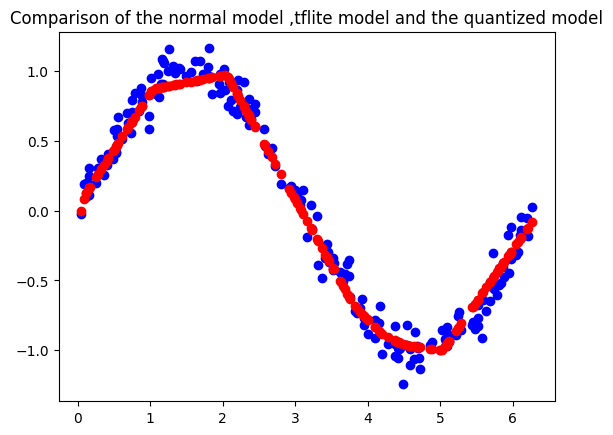

In [229]:
plt.clf()
plt.title("Comparison of the normal model ,tflite model and the quantized model")
plt.plot(x_test,y_test,'bo',label="Actual")
plt.plot(x_test,predictions,'ro',label='Og predictions')
plt.plot(x_test,sine_model_predictions,'b.',label='Lite predictions')
plt.plot(x_test,sine_model_q_predictions,'g.',label='Lite quantized predictions')
plt.legend()
plt.show()

#run again to solve this error

In [230]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 3180 bytes
Quantized model is 3792 bytes
Difference is -612 bytes
